In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import json
import pprint
from huggingface_hub import HfApi, create_repo
from lerobot.datasets.lerobot_dataset import LeRobotDataset, LeRobotDatasetMetadata
token = os.environ.get("HUGGINGFACE_HUB_TOKEN")

Index(['exterior_image_1_left', 'wrist_image_left', 'joint_position',
       'gripper_position', 'prompt', 'actions', 'timestamp', 'frame_index',
       'episode_index', 'index', 'task_index'],
      dtype='object')


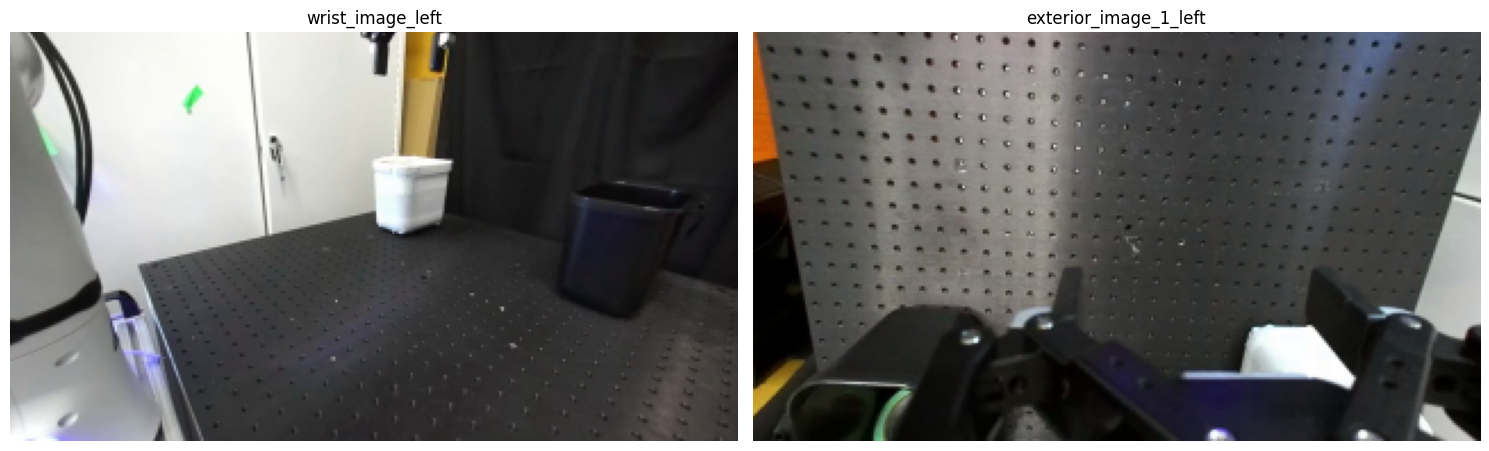

,exterior_image_1_left,wrist_image_left,joint_position,gripper_position,prompt,actions,timestamp,frame_index,episode_index,index,task_index
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.05495157837867737, -0.47647014260292053, -...",0.0,pick up the red block and put it in the black bin,"[0.08559041656553745, -0.14232847839593887, 0....",0.000000,0,100,8528,6
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.05206386744976044, -0.4772527515888214, -0...",0.0,pick up the red block and put it in the black bin,"[0.08849377743899822, -0.12668239884078503, 0....",0.066667,1,100,8529,6
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.040781170129776, -0.4772980809211731, -0.0...",0.0,pick up the red block and put it in the black bin,"[0.08708733133971691, 0.0016389667871408165, -...",0.133333,2,100,8530,6
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.04060027003288269, -0.47714418172836304, -...",0.0,pick up the red block and put it in the black bin,"[0.0941348448395729, -0.005455524078570306, 0....",0.200000,3,100,8531,6
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.03825754299759865, -0.4754311442375183, -0...",0.0,pick up the red block and put it in the black bin,"[0.10117116384208202, -0.015381899429485202, 0...",0.266667,4,100,8532,6
...,...,...,...,...,...,...,...,...,...,...,...
122,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.1827126443386078, 0.4019954204559326, -0.1...",0.0,pick up the red block and put it in the black bin,"[0.11924106627702713, -0.7228103280067444, 0.0...",8.133333,122,100,8650,6
123,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.1711091250181198, 0.3592322766780853, -0.1...",0.0,pick up the red block and put it in the black bin,"[0.11636976152658463, -0.71486696600914, 0.064...",8.200000,123,100,8651,6
124,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.15736255049705505, 0.3104686141014099, -0....",0.0,pick up the red block and put it in the black bin,"[0.10932182893157005, -0.6890927255153656, 0.0...",8.266666,124,100,8652,6
125,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[-0.1468292772769928, 0.2684207856655121, -0.1...",0.0,pick up the red block and put it in the black bin,"[0.10613290593028069, -0.6601423770189285, 0.0...",8.333333,125,100,8653,6


In [ ]:
REPO_ID = f"jennypan00/pi_ft_droid_exclude_01_pct_vel_norm_train"
parquet_path = f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/data/chunk-000/episode_000100.parquet"
df = pd.read_parquet(parquet_path)
print(df.keys())

image_cols = ['wrist_image_left', 'exterior_image_1_left']
fig, axes = plt.subplots(1, len(image_cols), figsize=(15, 5))

for col_idx, col in enumerate(image_cols):
    if col in df.columns:
        image_data = df[col].iloc[0]
        if isinstance(image_data, dict) and 'bytes' in image_data:
            # Convert bytes to PIL Image
            image_bytes = image_data['bytes']
            image = Image.open(io.BytesIO(image_bytes))
            
            axes[col_idx].imshow(image)
            axes[col_idx].set_title(f"{col}")
            axes[col_idx].axis('off')

plt.tight_layout()
plt.show()

df

Index(['recent_frame_1', 'keyframe_1', 'prompt', 'subtask_target', 'timestamp',
       'frame_index', 'episode_index', 'index', 'task_index'],
      dtype='object')


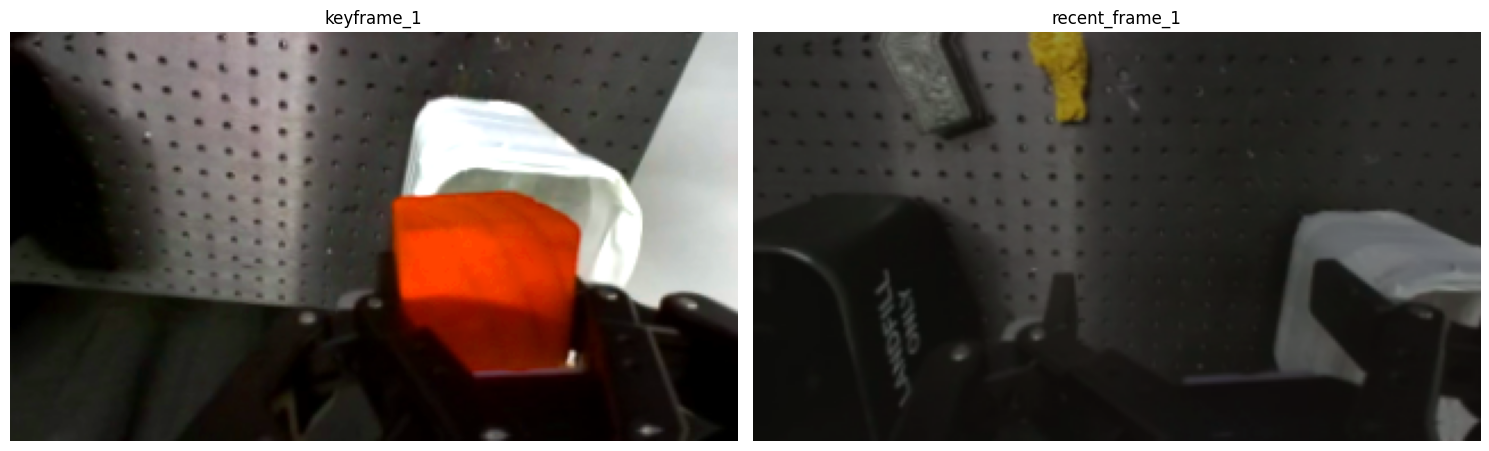

,recent_frame_1,keyframe_1,prompt,subtask_target,timestamp,frame_index,episode_index,index,task_index
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the fried chicken and put it in the wh...,0.000000,0,0,0,0
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the eraser and put it in the white bin,0.066667,1,0,1,0
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the red block and put it in the white bin,0.133333,2,0,2,0
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,look inside the white bin,0.200000,3,0,3,0
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,look inside the black bin,0.266667,4,0,4,0
...,...,...,...,...,...,...,...,...,...
650,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the eraser and put it in the white bin,43.333332,650,0,650,0
651,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the fried chicken and put it in the wh...,43.400002,651,0,651,0
652,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,pick up the purple marker and put it in the bl...,43.466667,652,0,652,0
653,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,You are a helpful assistant trying to instruct...,look inside the white bin,43.533333,653,0,653,0


In [ ]:
REPO_ID = "jennypan00/bin_sorting_hl_subtask_prediction_train"
parquet_path = f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/data/chunk-000/episode_000000.parquet"
df = pd.read_parquet(parquet_path)
print(df.keys())

image_cols = ['keyframe_1', 'recent_frame_1']
fig, axes = plt.subplots(1, len(image_cols), figsize=(15, 5))

for col_idx, col in enumerate(image_cols):
    if col in df.columns:
        image_data = df[col].iloc[0]
        if isinstance(image_data, dict) and 'bytes' in image_data:
            # Convert bytes to PIL Image
            image_bytes = image_data['bytes']
            image = Image.open(io.BytesIO(image_bytes))
            
            axes[col_idx].imshow(image)
            axes[col_idx].set_title(f"{col}")
            axes[col_idx].axis('off')

plt.tight_layout()
plt.show()

df

In [ ]:
print(">>>>>>>> episodes.jsonl:")
jsonl_data = []
with open(f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/meta/episodes.jsonl", 'r') as f:
    for line in f:
        jsonl_data.append(json.loads(line.strip()))
for i, episode in enumerate(jsonl_data):
    pprint.pprint(episode, width=120, depth=None)


>>>>>>>> episodes.jsonl:
{'episode_index': 0, 'length': 33, 'tasks': ['look inside the white bin']}
{'episode_index': 1, 'length': 71, 'tasks': ['look inside the black bin']}
{'episode_index': 2, 'length': 139, 'tasks': ['pick up the green tape and put it in the black bin']}
{'episode_index': 3, 'length': 124, 'tasks': ['pick up the eraser and put it in the white bin']}
{'episode_index': 4, 'length': 126, 'tasks': ['pick up the red block and put it in the white bin']}
{'episode_index': 5, 'length': 117, 'tasks': ['pick up the purple marker and put it in the black bin']}
{'episode_index': 6, 'length': 39, 'tasks': ['look inside the white bin']}
{'episode_index': 7, 'length': 75, 'tasks': ['look inside the black bin']}
{'episode_index': 8, 'length': 116, 'tasks': ['pick up the red block and put it in the black bin']}
{'episode_index': 9, 'length': 104, 'tasks': ['pick up the blue block and put it in the white bin']}
{'episode_index': 10, 'length': 118, 'tasks': ['pick up the fried chicke

In [ ]:
print(">>>>>>>> tasks.jsonl:")
jsonl_data = []
with open(f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/meta/tasks.jsonl", 'r') as f:
    for line in f:
        jsonl_data.append(json.loads(line.strip()))

for i, episode in enumerate(jsonl_data):
    pprint.pprint(episode, width=120, depth=None)

print(">>>>>>>> info.json:")
with open(f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/meta/info.json", 'r') as f:
    json_data = json.load(f)
pprint.pprint(json_data, width=120, depth=None)



>>>>>>>> tasks.jsonl:
{'task': 'look inside the white bin', 'task_index': 0}
{'task': 'look inside the black bin', 'task_index': 1}
{'task': 'pick up the green tape and put it in the black bin', 'task_index': 2}
{'task': 'pick up the eraser and put it in the white bin', 'task_index': 3}
{'task': 'pick up the red block and put it in the white bin', 'task_index': 4}
{'task': 'pick up the purple marker and put it in the black bin', 'task_index': 5}
{'task': 'pick up the red block and put it in the black bin', 'task_index': 6}
{'task': 'pick up the blue block and put it in the white bin', 'task_index': 7}
{'task': 'pick up the fried chicken and put it in the white bin', 'task_index': 8}
{'task': 'pick up the purple marker and put it in the white bin', 'task_index': 9}
{'task': 'pick up the eraser and put it in the black bin', 'task_index': 10}
{'task': 'pick up the green tape and put it in the white bin', 'task_index': 11}
{'task': 'pick up the fried chicken and put it in the black bin', '

In [ ]:
api = HfApi(token=token) 
create_repo(REPO_ID, repo_type="dataset", exist_ok=True, token = token)
# api.delete_repo(repo_id="jennypan00/bin_sorting_hl_subtask_prediction_train", repo_type="dataset", missing_ok=True) 
api.upload_folder(
    folder_path=f"/iris/u/jrpan/huggingface/lerobot/{REPO_ID}/",
    repo_id=REPO_ID,
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/jennypan00/bin_sorting_hl_subtask_prediction_train/commit/cc691f93129ed76f0e8b0a0e58f4ba02c43c1c30', commit_message='Upload folder using huggingface_hub', commit_description='', oid='cc691f93129ed76f0e8b0a0e58f4ba02c43c1c30', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jennypan00/bin_sorting_hl_subtask_prediction_train', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jennypan00/bin_sorting_hl_subtask_prediction_train'), pr_revision=None, pr_num=None)

In [ ]:
REPO_ID = "jennypan00/bin_sorting_hl_subtask_prediction_train"
api = HfApi(token=token)
dataset = LeRobotDataset(REPO_ID)
print(f"Loaded dataset: {REPO_ID}")
print(f"Dataset length: {len(dataset)}")

# Get the first episode
episode = dataset[0]
print(f"First episode keys: {episode.keys()}")

# Get the first observation
prompt = episode['prompt']
print(prompt)

# Get the first observation
keyframe = episode['recent_frame_1']
print(keyframe)

Loaded dataset: jennypan00/bin_sorting_hl_subtask_prediction_train
Dataset length: 655
First episode keys: dict_keys(['recent_frame_1', 'keyframe_1', 'prompt', 'subtask_target', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index', 'task'])
You are a helpful assistant trying to instruct a robot with action primitives to complete a task.

You are looking through an egocentric camera attached to the end-effector of a single arm manipulator.There are objects inside the white and black bins ahead of you. After looking at what objects are in each bin, the objects will appear on the table in front of you. 

You need to carefully observe and remember which specific objects were originally in each bin (white bin vs black bin) so that you can now sort the objects back into their correct bins. You have access to the following action primitives to control the robot:
- "look inside the <color> bin"
- "pick up the the <object_name> and put it in the <color> bin"
where <color> is one o